In [2]:
from ultralytics import YOLOv10
from PIL import Image
import numpy as np
import supervision as sv
import cv2
model = YOLOv10('best.pt')
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

In [3]:
!pip install av

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


(416, 416)


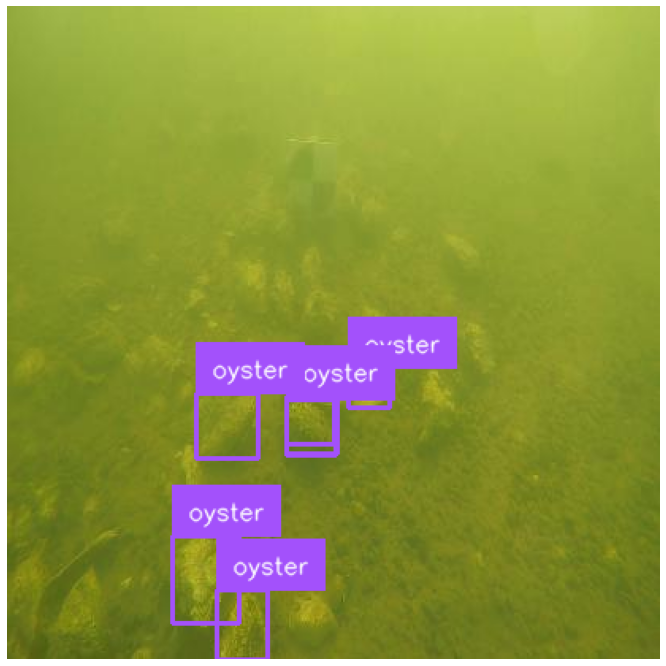

In [63]:

def run_pred(input_img, label_annotator = label_annotator, bounding_box_annotator = bounding_box_annotator, verbose = False):
    cont_img = np.ascontiguousarray(input_img, dtype=np.uint8)
    results = model(cont_img, conf=0.25, verbose = verbose)[0]
    detections = sv.Detections.from_ultralytics(results)
    annotated_image = bounding_box_annotator.annotate(
        scene=input_img, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)
    return(annotated_image)
im_pil = Image.open("oyster_test.jpg")
image = np.array(im_pil)
image_2 = np.array(Image.open('problem_photo_small.jpg'))
print(im_pil.size)
IMAGE_WIDTH = im_pil.size[0]
IMAGE_HEIGHT = im_pil.size[1]
ann_img = run_pred(image_2)
sv.plot_image(ann_img)


In [73]:
import av, os
from PIL import Image
video_path = 'GOPR1077.MP4'
container = av.open(video_path)
stream_vid = container.streams.video[0]

per_index = video_path.index('.')
# print(per_index)

outp = av.open(f'{video_path[:per_index]}_annotated.mp4', 'w')
codec_name = stream_vid.codec_context.name
fps = stream_vid.codec_context.rate
output_stream = outp.add_stream(codec_name, str(fps))
output_stream.width = IMAGE_WIDTH
output_stream.height = IMAGE_HEIGHT
output_stream.pix_fmt = stream_vid.codec_context.pix_fmt

for index, frame in enumerate(container.decode(stream_vid)):
    pil_img = frame.to_image()
    np_img = np.array(pil_img)
    np_img_resize = cv2.resize(np_img, (412, 412))
    np_rot = np_img_resize[:, :, ::-1]
    small_pil_img = Image.fromarray(np_rot)
    small_pil_img.save('dummy.jpg')
    image_2 = np.array(Image.open('dummy.jpg'))
    an_mg = run_pred(image_2, verbose = False)
    frame_out = av.VideoFrame.from_ndarray(image_2, format='bgr24')
    pkt = output_stream.encode(frame_out)
    outp.mux(pkt)
container.close()
outp.close()
os.remove('dummy.jpg')

In [36]:
import av, os
from PIL import Image
video_path = 'GOPR1077_tr.mp4'
container = av.open(video_path)
stream_vid = container.streams.video[0]

for index, frame in enumerate(container.decode(stream_vid)):
#     print(frame)
    pil_img = frame.to_image()
    pil_img.save('./problem_photo.jpg')
    np_img = np.array(pil_img)
#     np_img_resize = cv2.resize(np_img, (412, 412))
    np_img_resize = np_img
#     print(stream_vid.width)
    np_rot = np_img_resize[:, :, ::-1]
    small_pil_img = Image.fromarray(np_rot)
    small_pil_img.save('dummy.jpg')
    image_2 = np.array(Image.open('dummy.jpg'))
    an_mg = run_pred(image_2)
    frame_out = av.VideoFrame.from_ndarray(image_2, format='bgr24')
#     print(frame_out)
container.close()
os.remove('dummy.jpg')

<av.VideoFrame #0, pts=0 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #1, pts=1001 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718a2120>
<av.VideoFrame #2, pts=2002 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #3, pts=3003 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718a2120>
<av.VideoFrame #4, pts=4004 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #5, pts=5005 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718a2120>
<av.VideoFrame #6, pts=6006 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4740>
<av.VideoFrame #7, pts=7007 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<a

1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #62, pts=62062 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718b3b30>
<av.VideoFrame #63, pts=63063 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #64, pts=64064 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4740>
<av.VideoFrame #65, pts=65065 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718b3b30>
<av.VideoFrame #66, pts=66066 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c44a0>
<av.VideoFrame #67, pts=67067 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #68, pts=68068 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7

1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718a2120>
<av.VideoFrame #124, pts=124124 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4740>
<av.VideoFrame #125, pts=125125 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #126, pts=126126 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718a2120>
<av.VideoFrame #127, pts=127127 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c43c0>
<av.VideoFrame #128, pts=128128 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #129, pts=129129 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4350>
<av.VideoFrame #130, pts=130130 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 19

<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718b3b30>
<av.VideoFrame #184, pts=184184 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4740>
<av.VideoFrame #185, pts=185185 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #186, pts=186186 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c44a0>
<av.VideoFrame #187, pts=187187 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718b3b30>
<av.VideoFrame #188, pts=188188 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718a2120>
<av.VideoFrame #189, pts=189189 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #190, pts=190190 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x10

1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718b3b30>
<av.VideoFrame #244, pts=244244 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c43c0>
<av.VideoFrame #245, pts=245245 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #246, pts=246246 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718b3b30>
<av.VideoFrame #247, pts=247247 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4350>
<av.VideoFrame #248, pts=248248 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #249, pts=249249 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4740>
<av.VideoFrame #250, pts=250250 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 19

<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #304, pts=304304 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4820>
<av.VideoFrame #305, pts=305305 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718a2120>
<av.VideoFrame #306, pts=306306 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4350>
<av.VideoFrame #307, pts=307307 yuv420p 1920x1080 at 0x7f5f718c4820>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718b3b30>
<av.VideoFrame #308, pts=308308 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4820>
<av.VideoFrame #309, pts=309309 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #310, pts=310310 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x10

1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718b3b30>
<av.VideoFrame #365, pts=365365 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #366, pts=366366 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4350>
<av.VideoFrame #367, pts=367367 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #368, pts=368368 yuv420p 1920x1080 at 0x7f5f718b3b30>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718a2120>
<av.VideoFrame #369, pts=369369 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #370, pts=370370 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c43c0>
<av.VideoFrame #371, pts=371371 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 19

<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #425, pts=425425 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4740>
<av.VideoFrame #426, pts=426426 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718b3b30>
<av.VideoFrame #427, pts=427427 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c43c0>
<av.VideoFrame #428, pts=428428 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #429, pts=429429 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718b3b30>
<av.VideoFrame #430, pts=430430 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718a2120>
<av.VideoFrame #431, pts=431431 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x10

<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718b3b30>
<av.VideoFrame #486, pts=486486 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c44a0>
<av.VideoFrame #487, pts=487487 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #488, pts=488488 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4740>
<av.VideoFrame #489, pts=489489 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718a2120>
<av.VideoFrame #490, pts=490490 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c44a0>
<av.VideoFrame #491, pts=491491 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718b3b30>
<av.VideoFrame #492, pts=492492 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x10

1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718a2120>
<av.VideoFrame #546, pts=546546 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4740>
<av.VideoFrame #547, pts=547547 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #548, pts=548548 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718a2120>
<av.VideoFrame #549, pts=549549 yuv420p 1920x1080 at 0x7f5f718c4740>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c44a0>
<av.VideoFrame #550, pts=550550 yuv420p 1920x1080 at 0x7f5f718c4350>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718abd60>
<av.VideoFrame #551, pts=551551 yuv420p 1920x1080 at 0x7f5f718c43c0>
1920
<av.VideoFrame #0, pts=None bgr24 1920x1080 at 0x7f5f718c4350>
<av.VideoFrame #552, pts=552552 yuv420p 1920x1080 at 0x7f5f718c44a0>
1920
<av.VideoFrame #0, pts=None bgr24 19

In [51]:
inp = av.open(video_path)
outp = av.open(f'{video_path}-remuxed.mp4', 'w')
input_stream = inp.streams.video[0]
codec_name = input_stream.codec_context.name
fps = input_stream.codec_context.rate
output_stream = outp.add_stream(codec_name, str(fps))


output_stream.width = input_stream.codec_context.width
output_stream.height = input_stream.codec_context.height
output_stream.pix_fmt = input_stream.codec_context.pix_fmt




for index, frame in enumerate(inp.decode(input_stream)):
    pkt = output_stream.encode(frame)
    outp.mux(pkt)
inp.close()
outp.close()

In [35]:
import numpy as np
import cv2
import av
import io

n_frmaes = 100  # Select number of frames (for testing).
width, height, fps = 192, 108, 23.976  # Select video resolution and framerate.

output_memory_file = io.BytesIO()  # Create BytesIO "in memory file".

output = av.open(output_memory_file, 'w', format="mp4")  # Open "in memory file" as MP4 video output
stream = output.add_stream('h264', str(fps))  # Add H.264 video stream to the MP4 container, with framerate = fps.
stream.width = width  # Set frame width
stream.height = height  # Set frame height
stream.pix_fmt = 'yuv444p'   # Select yuv444p pixel format (better quality than default yuv420p).
stream.options = {'crf': '17'}  # Select low crf for high quality (the price is larger file size).


def make_sample_image(i):
    """ Build synthetic "raw BGR" image for testing """
    p = width//60
    img = np.full((height, width, 3), 60, np.uint8)
    cv2.putText(img, str(10*i+1), (width//2-p*10*len(str(i+1)), height//2+p*10), cv2.FONT_HERSHEY_DUPLEX, p, (255, 30, 30), p*2)  # Blue number
    return img


# Iterate the created images, encode and write to MP4 memory file.
for i in range(n_frmaes):
    img = make_sample_image(i)  # Create OpenCV image for testing (resolution 192x108, pixel format BGR).
    frame = av.VideoFrame.from_ndarray(img, format='bgr24')  # Convert image from NumPy Array to frame.
    packet = stream.encode(frame)  # Encode video frame
    output.mux(packet)  # "Mux" the encoded frame (add the encoded frame to MP4 file).

# Flush the encoder
packet = stream.encode(None)
output.mux(packet)

output.close()

# Write BytesIO from RAM to file, for testing
with open("output.mp4", "wb") as f:
    f.write(output_memory_file.getbuffer())

In [54]:
!pip install cv

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [56]:
input_imgdef get_frames(filename):
    video = cv2.VideoCapture(filename)

    while video.isOpened():
        ret, frame = video.read()

        if ret:
            yield frame
        else:
            break
    video.release()
    yield None

AttributeError: module 'cv2' has no attribute 'CaptureFromFile'

In [20]:
import cv2
import numpy as np

cap = cv2.VideoCapture('GOPR1077_tr.mp4')
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

# cv2.namedWindow('frame 10')
# cv2.imshow('frame 10', buf[9])

# cv2.waitKey(0)

In [52]:
import numpy as np
from notebook_video_writer import VideoWriter

with VideoWriter(fps=40) as vw:
    for i in range(len(buf)):
        frame = run_pred(buf[i])
        vw.add(frame)


0: 384x640 (no detections), 3.4ms
Speed: 14.2ms preprocess, 3.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.1ms
Speed: 1.3ms preprocess, 4.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.3ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.4ms
Speed: 1.0ms preprocess, 3.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.3ms
Speed: 1.0ms preprocess, 3.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.4ms
Speed: 0.9ms preprocess, 3.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.2ms
Speed: 1.1ms preprocess, 3.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.2ms
Speed: 0.9ms preprocess, 3.2ms inference, 0.3ms


0: 384x640 (no detections), 3.4ms
Speed: 1.3ms preprocess, 3.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.3ms
Speed: 1.0ms preprocess, 3.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.3ms
Speed: 0.9ms preprocess, 3.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.5ms
Speed: 1.4ms preprocess, 8.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.6ms
Speed: 1.3ms preprocess, 8.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.3ms 


0: 384x640 (no detections), 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.5ms
Speed: 1.3ms preprocess, 4.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.6ms
Speed: 1.3ms preprocess, 5.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.3ms
Speed: 0.9ms preprocess, 3.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.3ms
Speed: 1.4ms preprocess, 8.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.1ms
Speed: 1.4ms preprocess, 8.1ms inference, 0.6ms 


0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.4ms
Speed: 0.9ms preprocess, 3.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.4ms
Speed: 0.9ms preprocess, 3.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.4ms
Speed: 0.9ms preprocess, 3.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.8ms
Speed: 1.3ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.6ms
Speed: 1.3ms preprocess, 4.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.3ms
Speed: 0.9ms preprocess, 3.3ms inference, 0.3ms 


0: 384x640 (no detections), 3.5ms
Speed: 1.4ms preprocess, 3.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.5ms
Speed: 1.3ms preprocess, 4.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.8ms
Speed: 1.3ms preprocess, 8.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.4ms
Speed: 1.3ms preprocess, 8.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.8ms
Speed: 1.3ms preprocess, 6.8ms inference, 0.3ms 


0: 384x640 (no detections), 3.3ms
Speed: 0.8ms preprocess, 3.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.7ms
Speed: 1.3ms preprocess, 4.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.1ms
Speed: 0.8ms preprocess, 3.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.3ms
Speed: 0.8ms preprocess, 3.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.4ms
Speed: 0.8ms preprocess, 3.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.4ms
Speed: 0.8ms preprocess, 3.4ms inference, 0.3ms 


0: 384x640 (no detections), 4.5ms
Speed: 1.2ms preprocess, 4.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.2ms
Speed: 0.9ms preprocess, 3.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.3ms
Speed: 0.8ms preprocess, 3.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.2ms
Speed: 1.0ms preprocess, 4.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.2ms
Speed: 1.4ms preprocess, 9.2ms inference, 0.7ms 


0: 384x640 (no detections), 3.4ms
Speed: 0.9ms preprocess, 3.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.3ms
Speed: 0.9ms preprocess, 3.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.1ms
Speed: 1.5ms preprocess, 6.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.7ms
Speed: 1.3ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.1ms
Speed: 1.4ms preprocess, 8.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.4ms
Speed: 1.3ms preprocess, 3.4ms inference, 0.5ms 


0: 384x640 (no detections), 8.5ms
Speed: 1.4ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.7ms
Speed: 1.4ms preprocess, 5.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.3ms
Speed: 0.8ms preprocess, 3.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.1ms
Speed: 1.4ms preprocess, 4.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.3ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.4ms
Speed: 1.0ms preprocess, 3.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 0.8ms 


0: 384x640 (no detections), 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.2ms
Speed: 1.3ms preprocess, 4.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.4ms
Speed: 1.4ms preprocess, 6.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.2ms
Speed: 0.9ms preprocess, 3.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.8ms
Speed: 0.9ms preprocess, 3.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.4ms
Speed: 0.8ms preprocess, 3.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.5ms
Speed: 1.3ms preprocess, 6.5ms inference, 0.3ms 

In [44]:
print(buf[0].shape)
print(image.shape)

(1080, 1920, 3)
(416, 416, 3)


In [48]:
print(annotated_image.shape)

(416, 416, 3)


In [26]:
import av, os, io
from PIL import Image
video_path = 'GOPR1077_tr.mp4'
container = av.open(video_path)
stream = container.streams.video[0]
# stream
fps = float(stream.average_rate)
output_memory_file = io.BytesIO()
output = av.open(output_memory_file, 'w', format="mp4")
stream = output.add_stream('h264', str(fps))
stream.width = 640
stream.height = 640
stream.pix_fmt = 'yuv444p'
stream.options = {'crf': '17'}
# print(fps)
for index, frame in enumerate(container.decode(stream)):
    print(frame)
    pil_img = frame.to_image()
    pil_img.save('./problem_photo.jpg')
    np_img = np.array(pil_img)
    np_img_resize = cv2.resize(np_img, (412, 412))

#         print(np_img_resize.shape)
#         sv.plot_image(np_img_resize)
#         sv.plot_image(np_img)
    np_rot = np_img_resize[:, :, ::-1]
    small_pil_img = Image.fromarray(np_rot)
    small_pil_img.save('dummy.jpg')
    image_2 = np.array(Image.open('dummy.jpg'))
    an_mg = run_pred(image_2)
    frame_out = av.VideoFrame.from_ndarray(image_2, format='bgr24')
    packet = stream.encode(frame)  
packet = stream.encode(None)
output.mux(packet)
output.close()

with open("output.mp4", "wb") as f:
    f.write(output_memory_file.getbuffer())

os.remove('dummy.jpg')

OverflowError: value too large to convert to int